# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from itertools import chain
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Data

In [3]:
df_2020 = pd.read_csv("C:/suhas/IT2020.csv")

# Describing the Data

In [4]:
df_2020

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,18/01/2021 15:05:50,31.0,Male,Berlin,Backend Developer,9,5,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",...,72000,26,Full-time employee,Unlimited contract,English,51-100,Product,Yes,NaN,NaN
1249,18/01/2021 17:46:02,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,1.5,Senior,consumer analysis,NaN,...,2500,unlimited,Full-time employee,Unlimited contract,English,1000+,Product,No,NaN,0
1250,18/01/2021 23:20:35,39.0,Male,Munich,IT Operations Manager,15,2,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",...,NaN,28,Full-time employee,Unlimited contract,English,101-1000,eCommerce,No,NaN,NaN
1251,19/01/2021 10:17:58,26.0,Male,Saarbrücken,Frontend Developer,7,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",...,36400,27,Full-time employee,Unlimited contract,German,101-1000,Product,No,NaN,0


# Dataset Type

In [26]:
type(df_2020)

pandas.core.frame.DataFrame

# Dataset Shape

In [18]:
df_2020.shape

(1253, 23)

 # Listing all columns names 

In [19]:
print(df_2020.columns.tolist())

['Timestamp', 'Age', 'Gender', 'City', 'Position ', 'Total years of experience', 'Years of experience in Germany', 'Seniority level', 'Your main technology / programming language', 'Other technologies/programming languages you use often', 'Yearly brutto salary (without bonus and stocks) in EUR', 'Yearly bonus + stocks in EUR', 'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country', 'Annual bonus+stocks one year ago. Only answer if staying in same country', 'Number of vacation days', 'Employment status', 'Сontract duration', 'Main language at work', 'Company size', 'Company type', 'Have you lost your job due to the coronavirus outbreak?', 'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week', 'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR']


# Identifying The Data Types of different columns / schema

In [16]:
dataTypeSeries = df_2020.dtypes

print(dataTypeSeries)

Timestamp                                                                                                                   object
Age                                                                                                                        float64
Gender                                                                                                                      object
City                                                                                                                        object
Position                                                                                                                    object
Total years of experience                                                                                                   object
Years of experience in Germany                                                                                              object
Seniority level                                                                    

# Displaying the first seven rows of the Data

In [10]:
df_2020.head(7)

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
5,24/11/2020 11:15:53,32.0,Male,Berlin,DevOps,5,1,Senior,"AWS, GCP, Python,K8s","Python, AWS, Google Cloud, Kubernetes, Docker",...,5000,30,Full-time employee,Unlimited contract,English,11-50,Startup,No,NaN,NaN
6,24/11/2020 11:16:35,37.0,Male,Berlin,Frontend Developer,6,0.4,Middle,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,11-50,Product,No,NaN,NaN


# Displaying the last seven rows of the Data

In [12]:
df_2020.tail(7)

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
1246,18/01/2021 09:51:30,38.0,Male,Berlin,Head of Engineering,18,8,Head,NaN,"Javascript / Typescript, SQL, Go, AWS, Google ...",...,20000,26,Full-time employee,Unlimited contract,German,51-100,Product,No,NaN,NaN
1247,18/01/2021 11:50:02,34.0,Male,Zurich,Software Engineer,7,2,Senior,PHP,PHP,...,NaN,25,Full-time employee,Unlimited contract,English,11-50,Startup,No,NaN,NaN
1248,18/01/2021 15:05:50,31.0,Male,Berlin,Backend Developer,9,5,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",...,72000,26,Full-time employee,Unlimited contract,English,51-100,Product,Yes,NaN,NaN
1249,18/01/2021 17:46:02,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,1.5,Senior,consumer analysis,NaN,...,2500,unlimited,Full-time employee,Unlimited contract,English,1000+,Product,No,NaN,0
1250,18/01/2021 23:20:35,39.0,Male,Munich,IT Operations Manager,15,2,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",...,NaN,28,Full-time employee,Unlimited contract,English,101-1000,eCommerce,No,NaN,NaN
1251,19/01/2021 10:17:58,26.0,Male,Saarbrücken,Frontend Developer,7,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",...,36400,27,Full-time employee,Unlimited contract,German,101-1000,Product,No,NaN,0
1252,19/01/2021 12:01:11,26.0,Male,Berlin,DevOps,2,2,Middle,yaml,"Python, AWS, Kubernetes, Docker, terraform, an...",...,0,30,Full-time employee,Unlimited contract,English,51-100,Startup,No,30.0,600


# Displaying number of null values in each column

In [20]:
df_2020.isnull().sum()

Timestamp                                                                                                                    0
Age                                                                                                                         27
Gender                                                                                                                      10
City                                                                                                                         0
Position                                                                                                                     6
Total years of experience                                                                                                   16
Years of experience in Germany                                                                                              32
Seniority level                                                                                                

# Displaying the number of unique values in each column

In [22]:
df_2020.nunique()

Timestamp                                                                                                                  1248
Age                                                                                                                          40
Gender                                                                                                                        3
City                                                                                                                        119
Position                                                                                                                    148
Total years of experience                                                                                                    48
Years of experience in Germany                                                                                               53
Seniority level                                                                                         

# Correlation between the variables 

In [23]:
df_2020.corr()

,Age,Yearly brutto salary (without bonus and stocks) in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week"
Age,1.000000,-0.017259,-0.024847,-0.003563
Yearly brutto salary (without bonus and stocks) in EUR,-0.017259,1.000000,0.999998,-0.044144
Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,-0.024847,0.999998,1.000000,-0.050298
"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week",-0.003563,-0.044144,-0.050298,1.000000


#  Categorical Variables and their Descriptive statistics

In [24]:
df_2020.describe(include=['O'])

,Timestamp,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly bonus + stocks in EUR,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
count,1253,1243,1253,1247,1237,1221,1241,1126,1096,829,614,1185,1236,1224,1237,1235,1228,1233,462
unique,1248,3,119,148,48,53,24,256,562,168,131,45,11,3,14,5,63,10,59
top,24/11/2020 15:07:35,Male,Berlin,Software Engineer,10,2,Senior,Java,Javascript / Typescript,0,0,30,Full-time employee,Unlimited contract,English,1000+,Product,No,0
freq,2,1049,681,387,138,195,565,184,44,227,200,488,1190,1159,1020,448,760,1162,161


# Numeric Variables and their  Descriptive statistics

In [25]:
df_2020.describe(exclude=['O'])

,Age,Yearly brutto salary (without bonus and stocks) in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week"
count,1226.000000,1.253000e+03,8.850000e+02,373.000000
mean,32.509788,8.027904e+07,6.322459e+05,12.967828
std,5.663804,2.825061e+09,1.680508e+07,15.275174
min,20.000000,1.000100e+04,1.100000e+04,0.000000
25%,29.000000,5.880000e+04,5.500000e+04,0.000000
50%,32.000000,7.000000e+04,6.500000e+04,0.000000
75%,35.000000,8.000000e+04,7.500000e+04,30.000000
max,69.000000,1.000000e+11,5.000000e+08,40.000000


# Descriptive statistics of particular column

In [30]:
df_2020['Yearly brutto salary (without bonus and stocks) in EUR'].describe()

count    1.253000e+03
mean     8.027904e+07
std      2.825061e+09
min      1.000100e+04
25%      5.880000e+04
50%      7.000000e+04
75%      8.000000e+04
max      1.000000e+11
Name: Yearly brutto salary (without bonus and stocks) in EUR, dtype: float64

# VISUALIZATION 

# # Outliers of Yearly brutto salary in EUR

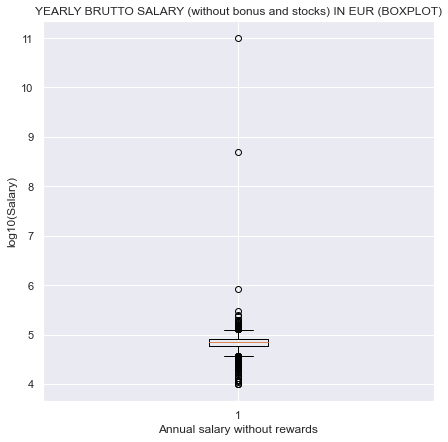

In [68]:
plt.figure(figsize = (7,7))
plt.boxplot(np.log10(df_2020['Yearly brutto salary (without bonus and stocks) in EUR']))
plt.xlabel('Annual salary without rewards')
plt.title('YEARLY BRUTTO SALARY (without bonus and stocks) IN EUR (BOXPLOT)')
plt.ylabel('log10(Salary)')
plt.show()

## Plot for number of Employees who lost their job due to Coronavirus.

Text(0.5, 1.0, 'EMPLOYEES WHO LOST JOB DUE TO CORONAVIRUS OUTBREAK')

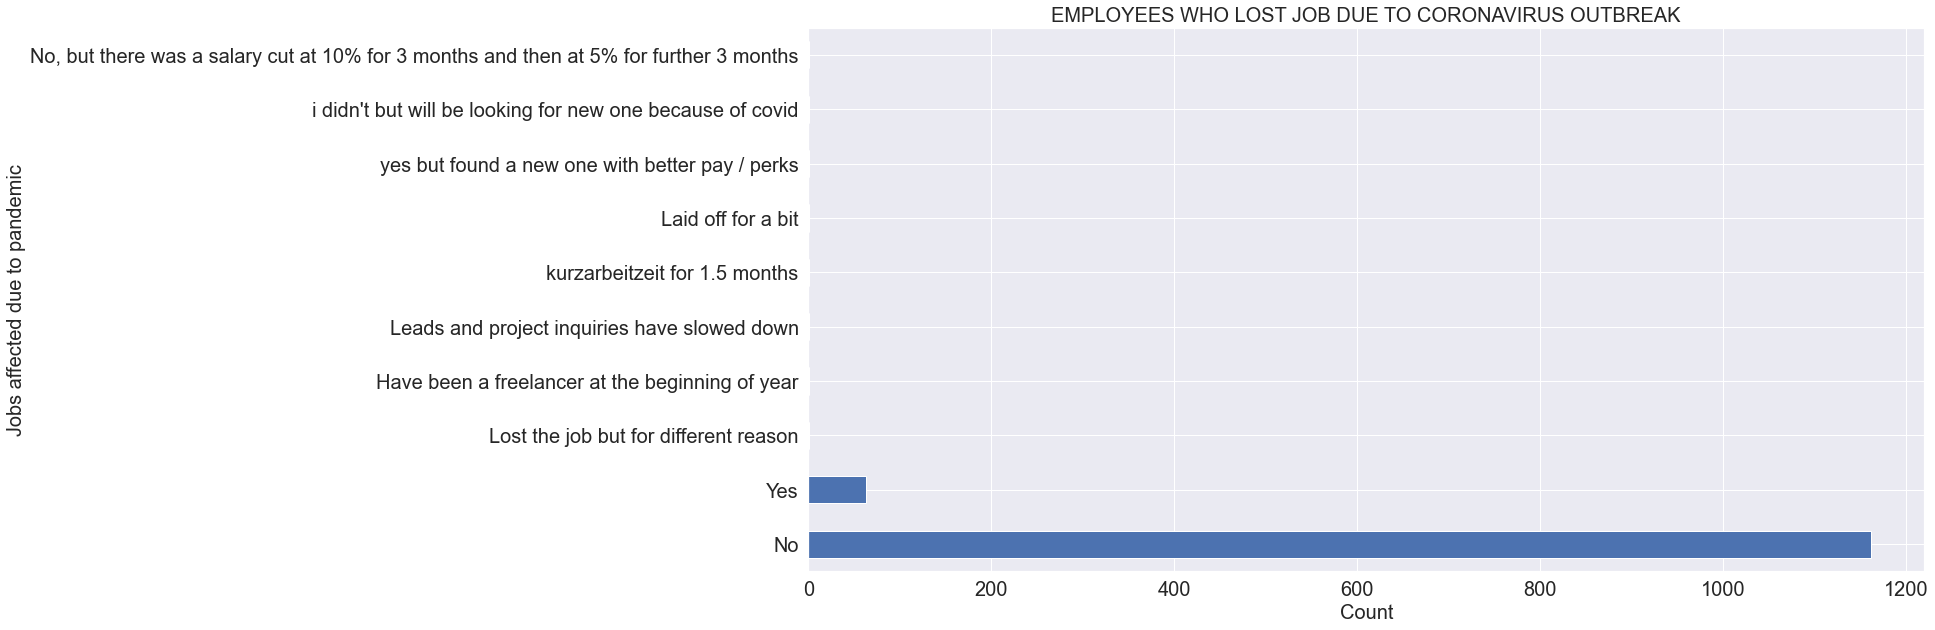

In [78]:
df_2020['Have you lost your job due to the coronavirus outbreak?'].value_counts().plot(kind='barh' ,figsize=(20, 10) , fontsize = 20)
plt.xlabel("Count",fontsize = 20 )
plt.ylabel("Jobs affected due to pandemic" ,fontsize = 20 )
plt.title("EMPLOYEES WHO LOST JOB DUE TO CORONAVIRUS OUTBREAK", fontsize = 20 )

## Plot for employees with different contract duration. 

Text(0.5, 1.0, 'COUNT OF PEOPLE WHO ARE HAVING DIFFERENT CONTRACTS')

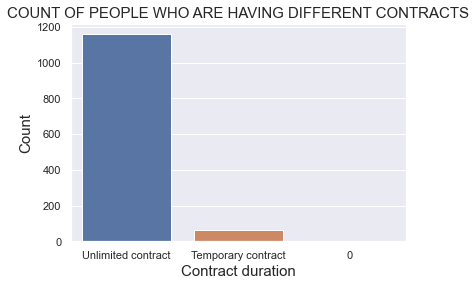

In [76]:
sns.set()
ax = sns.countplot(x="Сontract duration",data=df_2020)

plt.xlabel('Сontract duration',fontsize = 15) 
plt.ylabel('Count', fontsize = 15) 
plt.title("COUNT OF PEOPLE WHO ARE HAVING DIFFERENT CONTRACTS", fontsize = 15)

## Pie-Chart of different Genders and its Proportion.

Text(0.5, 1.0, 'PROPORTION OF GENDERS')

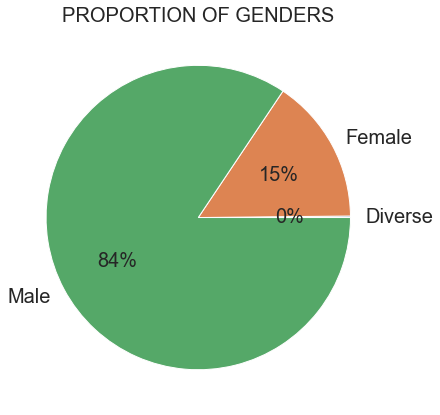

In [77]:
df_2020.Gender.str.get_dummies().sum().plot.pie(label='', autopct='%1.0f%%',figsize=(10, 7) , fontsize = 20)
plt.title("PROPORTION OF GENDERS", fontsize = 20)

## Histogram displaying different age of employees

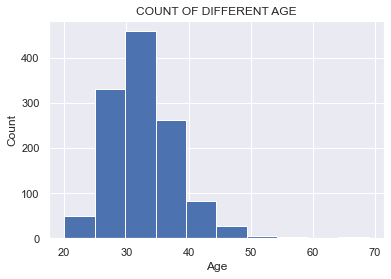

In [61]:
sns.set_theme(style="darkgrid")
p8= plt.hist(df_2020['Age'],bins=10)
plt.xlabel('Age') 
plt.ylabel('Count') 
plt.title("COUNT OF DIFFERENT AGE")
plt.show(p8)

## Box-Plot displaying distribution of ages on the basis of their gender 

Text(0.5, 1.0, 'GENDERS RESPECTIVE TO THEIR AGES')

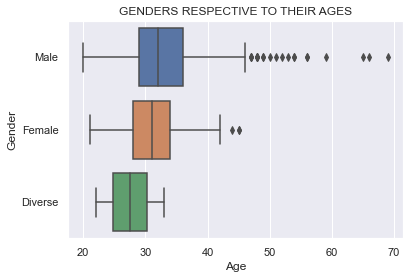

In [80]:
sns.set_theme(style="darkgrid")
ax = sns.boxplot(x="Age", y="Gender", data=df_2020)
plt.xlabel('Age') 
plt.ylabel('Gender') 
plt.title("GENDERS RESPECTIVE TO THEIR AGES")

## Bar plot representing the number of  companies based on their employee count

Text(0.5, 1.0, 'DIFFERENT COMPANY SIZES AND ITS COUNT')

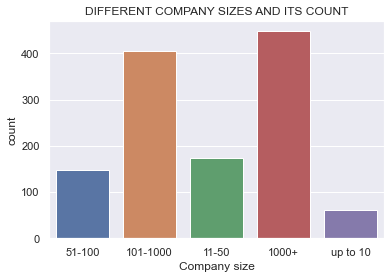

In [81]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Company size",data=df_2020)
plt.xlabel('Company size') 
plt.ylabel('count') 
plt.title("DIFFERENT COMPANY SIZES AND ITS COUNT")